In [5]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import os
import random

# Update to your model's best weights and images locations
train_results_path = os.path.join(r"/home", "tjriz", "Documents", "Senior-Design", "YOLOv11_training_SADD", "runs", "detect")
test_images_200_path = os.path.join(r"/home", "tjriz", "Documents", "Senior-Design", "datasets", "SADD", "hust-rslab-SAR-aircraft-data.v2i.yolov11.resize200", "test", "images")
best_weight_200_path = os.path.join(train_results_path, "airplane_detection_resize200_2", "weights", "best.pt")
test_images_224_path = os.path.join(r"/home", "tjriz", "Documents", "Senior-Design", "datasets", "SADD", "hust-rslab-SAR-aircraft-data.v2i.yolov11.newsplit", "test", "images")
best_weight_224_path = os.path.join(train_results_path, "airplane_detection_2", "weights", "best.pt")
test_images_640_path = os.path.join(r"/home", "tjriz", "Documents", "Senior-Design", "datasets", "SADD", "hust-rslab-SAR-aircraft-data.v2i.yolov11.resize640", "test", "images")
best_weight_640_path = os.path.join(train_results_path, "airplane_detection_resize640_newsplit", "weights", "best.pt")


test_image_files = [f for f in os.listdir(test_images_200_path) if f.endswith('.jpg')]
test_image_name = random.choice(test_image_files)
# For explicitly defining
# test_image_name = "00027_bmp.rf.b2d5ae8fc24f145a0c46c283e0783a0c.jpg"

print(test_image_name)

01903_bmp.rf.e11573a4c196bdbcdc15a08befb015f7.jpg



image 1/1 /home/tjriz/Documents/Senior-Design/datasets/SADD/hust-rslab-SAR-aircraft-data.v2i.yolov11.resize200/test/images/01903_bmp.rf.e11573a4c196bdbcdc15a08befb015f7.jpg: 224x224 12 airplanes, 4.6ms
Speed: 0.3ms preprocess, 4.6ms inference, 0.9ms postprocess per image at shape (1, 3, 224, 224)

Original labeled detections for test image (contents of annotation file):
0 0.05803571428571429 0.16294642857142858 0.11607142857142858 0.18303571428571427

0 0.2700892857142857 0.16741071428571427 0.15625 0.18303571428571427

0 0.48214285714285715 0.17410714285714285 0.14285714285714285 0.20535714285714285

0 0.7120535714285714 0.16741071428571427 0.14732142857142858 0.19196428571428573

0 0.921875 0.17633928571428573 0.14732142857142858 0.19196428571428573

0 0.47767857142857145 0.578125 0.14285714285714285 0.15625

0 0.7098214285714286 0.5915178571428571 0.11607142857142858 0.16517857142857142

0 0.9308035714285714 0.5848214285714286 0.12053571428571429 0.16071428571428573
Expected number

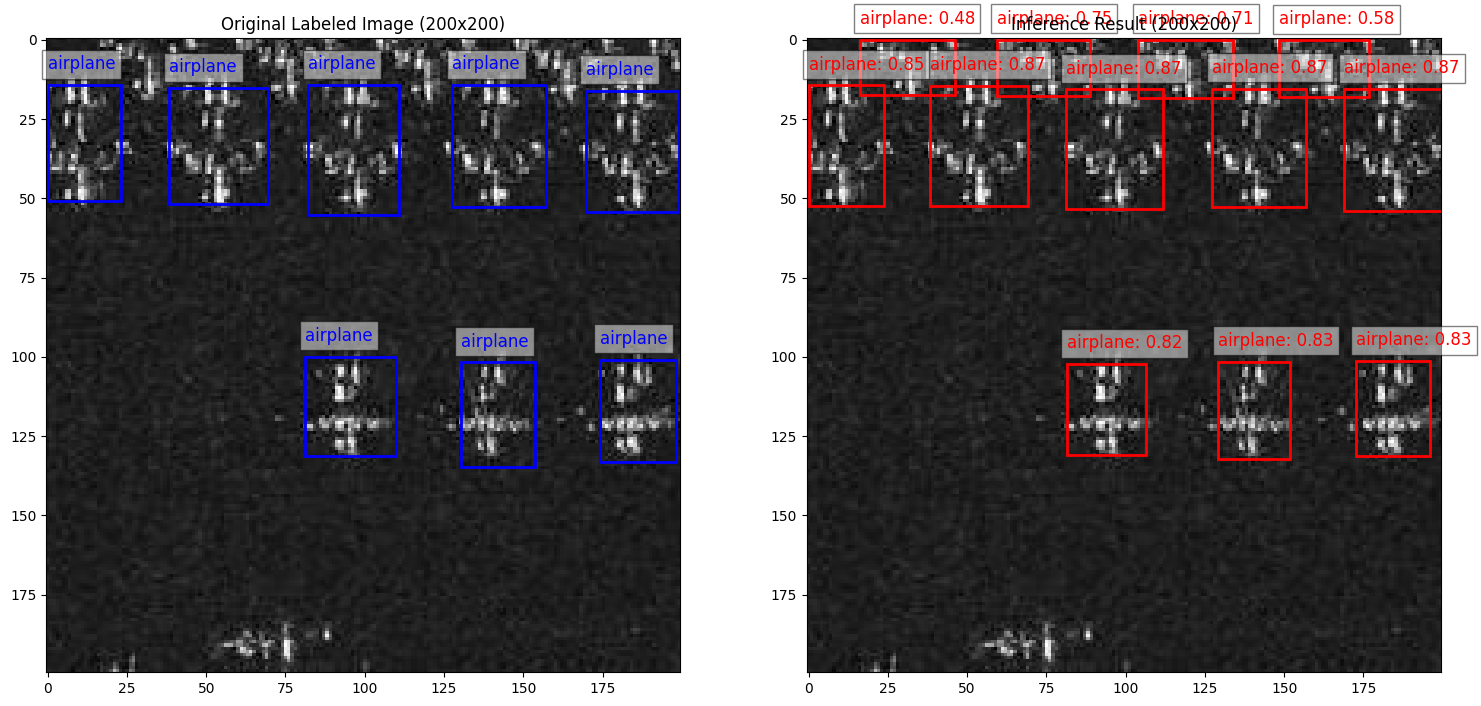

Inference Detections:
{'class': 'airplane', 'confidence': 0.8718351125717163, 'bbox': [168.99838256835938, 15.518294334411621, 199.7078399658203, 53.965965270996094]}
{'class': 'airplane', 'confidence': 0.8707937598228455, 'bbox': [127.29788970947266, 15.466506004333496, 156.79425048828125, 52.67029571533203]}
{'class': 'airplane', 'confidence': 0.8703749179840088, 'bbox': [81.28825378417969, 15.642257690429688, 111.9364013671875, 53.35039138793945]}
{'class': 'airplane', 'confidence': 0.8677187561988831, 'bbox': [38.32415771484375, 14.443705558776855, 69.13715362548828, 52.29364776611328]}
{'class': 'airplane', 'confidence': 0.8480135202407837, 'bbox': [0.0, 14.39919662475586, 23.813961029052734, 52.416221618652344]}
{'class': 'airplane', 'confidence': 0.8309532999992371, 'bbox': [172.68731689453125, 101.39884948730469, 195.91806030273438, 131.36642456054688]}
{'class': 'airplane', 'confidence': 0.8267934918403625, 'bbox': [129.13943481445312, 101.50582885742188, 151.8968048095703, 13

In [6]:
# Load the trained YOLO model with the best weights for 200x200 image size
model = YOLO(best_weight_200_path)

test_image_path = os.path.join(test_images_200_path, test_image_name)

# Perform inference on the test image
results = model(test_image_path)  # Perform detection
detections = results[0].boxes  # Retrieve detection results from the first (and only) image

# Collect the detections in a structured format
detection_list = []
for box in detections:
    x_min, y_min, x_max, y_max = box.xyxy[0].tolist()  # Get bounding box coordinates
    confidence = box.conf[0].item()  # Get confidence score
    class_id = int(box.cls[0].item())  # Get class ID
    class_name = model.names[class_id]  # Get the class name using the model's label dictionary
    detection = {
        'class': class_name,
        'confidence': confidence,
        'bbox': [x_min, y_min, x_max, y_max]  # Format as [x_min, y_min, x_max, y_max]
    }
    detection_list.append(detection)

# Path to the corresponding label file
label_path = os.path.join(test_images_200_path.replace('images', 'labels'), test_image_name.replace('.jpg', '.txt'))

# Load original bounding boxes from the label file
original_boxes = []
with Image.open(test_image_path) as img:
    img_width, img_height = img.size
    
if os.path.exists(label_path):
    print("\nOriginal labeled detections for test image (contents of annotation file):")
    with open(label_path, 'r') as f:
        for line in f:
            print(line)
            parts = line.split()
            class_id = int(parts[0])
            x_center, y_center, width, height = map(float, parts[1:])
            x_min = (x_center - width / 2) * img_width
            y_min = (y_center - height / 2) * img_height
            x_max = x_min + width * img_width
            y_max = y_min + height * img_height
            original_boxes.append({
                'class': model.names[class_id],
                'bbox': [x_min, y_min, x_max, y_max]
            })

print("Expected number of detections:", len(original_boxes))

# Display the test image with both inference and original labeled bounding boxes side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))

# Plot original labeled image
with Image.open(test_image_path) as img:
    ax1.imshow(img)
    for box in original_boxes:
        x_min, y_min, x_max, y_max = box['bbox']
        rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='blue', facecolor='none')
        ax1.add_patch(rect)
        ax1.text(x_min, y_min - 5, box['class'], color='blue', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
    ax1.set_title('Original Labeled Image (200x200)')

# Plot inference result
with Image.open(test_image_path) as img:
    ax2.imshow(img)
    for det in detection_list:
        x_min, y_min, x_max, y_max = det['bbox']
        rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='red', facecolor='none')
        ax2.add_patch(rect)
        label = f"{det['class']}: {det['confidence']:.2f}"
        ax2.text(x_min, y_min - 5, label, color='red', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
    ax2.set_title('Inference Result (200x200)')

plt.show()

# Print detection list for inference results
print("Inference Detections:")
for det in detection_list:
    print(det)
print("Number of inference detections:", len(detection_list))


image 1/1 /home/tjriz/Documents/Senior-Design/datasets/SADD/hust-rslab-SAR-aircraft-data.v2i.yolov11.newsplit/test/images/01903_bmp.rf.e11573a4c196bdbcdc15a08befb015f7.jpg: 224x224 13 airplanes, 4.8ms
Speed: 0.3ms preprocess, 4.8ms inference, 0.6ms postprocess per image at shape (1, 3, 224, 224)

Original labeled detections for test image (contents of annotation file):
0 0.05803571428571429 0.16294642857142858 0.11607142857142858 0.18303571428571427

0 0.2700892857142857 0.16741071428571427 0.15625 0.18303571428571427

0 0.48214285714285715 0.17410714285714285 0.14285714285714285 0.20535714285714285

0 0.7120535714285714 0.16741071428571427 0.14732142857142858 0.19196428571428573

0 0.921875 0.17633928571428573 0.14732142857142858 0.19196428571428573

0 0.47767857142857145 0.578125 0.14285714285714285 0.15625

0 0.7098214285714286 0.5915178571428571 0.11607142857142858 0.16517857142857142

0 0.9308035714285714 0.5848214285714286 0.12053571428571429 0.16071428571428573
Expected number 

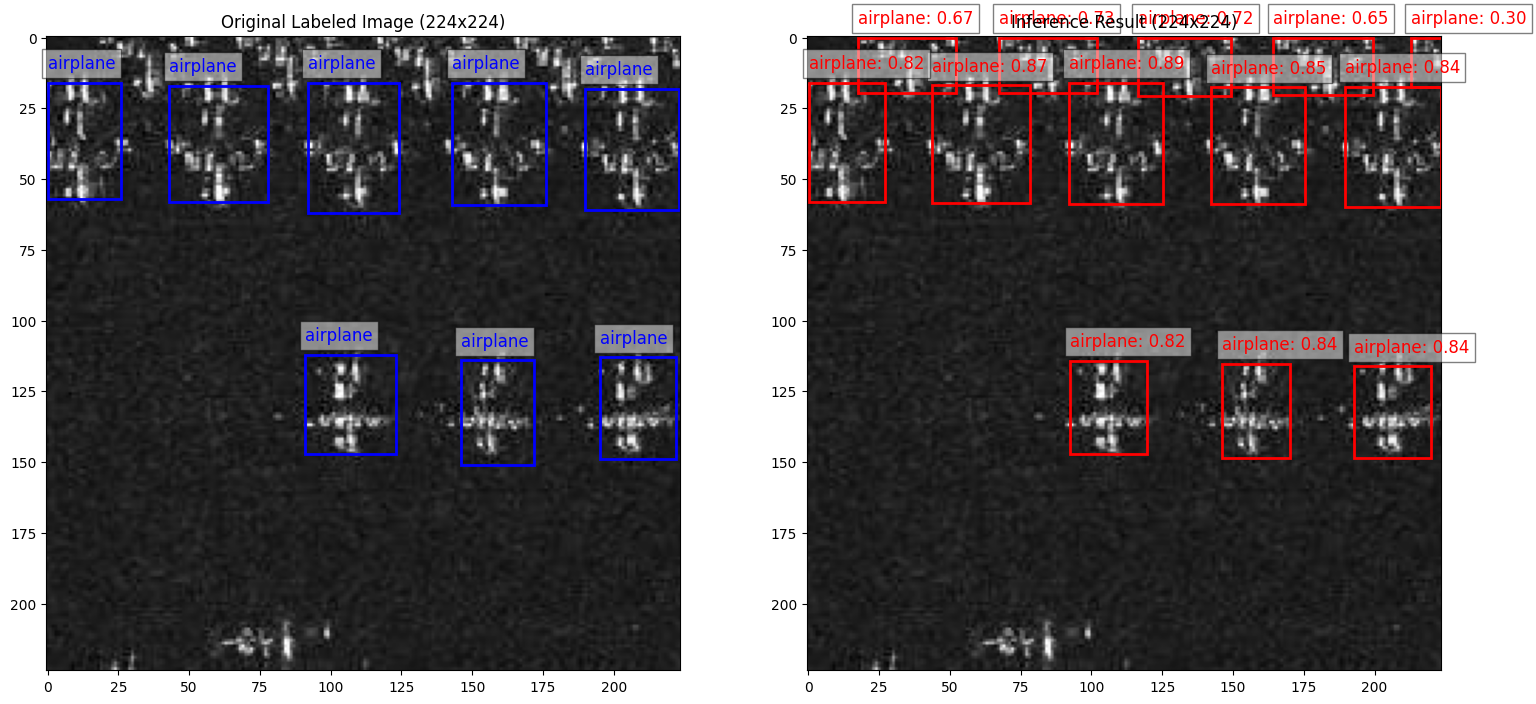

Inference Detections:
{'class': 'airplane', 'confidence': 0.8854450583457947, 'bbox': [91.98001098632812, 15.963628768920898, 125.39280700683594, 58.85326385498047]}
{'class': 'airplane', 'confidence': 0.8697534799575806, 'bbox': [43.74821472167969, 16.905187606811523, 78.37651062011719, 58.30052947998047]}
{'class': 'airplane', 'confidence': 0.8513616919517517, 'bbox': [142.25686645507812, 17.54821014404297, 175.41427612304688, 58.67205047607422]}
{'class': 'airplane', 'confidence': 0.8448965549468994, 'bbox': [192.6464080810547, 116.1474609375, 219.85240173339844, 148.5750732421875]}
{'class': 'airplane', 'confidence': 0.8437098264694214, 'bbox': [146.238525390625, 115.18968200683594, 170.070556640625, 148.6243438720703]}
{'class': 'airplane', 'confidence': 0.8415660262107849, 'bbox': [189.38494873046875, 17.43198013305664, 223.45980834960938, 59.74733352661133]}
{'class': 'airplane', 'confidence': 0.8236435055732727, 'bbox': [0.14659881591796875, 15.934837341308594, 26.9345588684082

In [7]:
# Load the trained YOLO model with the best weights for 224x224 image size
model = YOLO(best_weight_224_path)

test_image_path = os.path.join(test_images_224_path, test_image_name)

# Perform inference on the test image
results = model(test_image_path)  # Perform detection
detections = results[0].boxes  # Retrieve detection results from the first (and only) image

# Collect the detections in a structured format
detection_list = []
for box in detections:
    x_min, y_min, x_max, y_max = box.xyxy[0].tolist()  # Get bounding box coordinates
    confidence = box.conf[0].item()  # Get confidence score
    class_id = int(box.cls[0].item())  # Get class ID
    class_name = model.names[class_id]  # Get the class name using the model's label dictionary
    detection = {
        'class': class_name,
        'confidence': confidence,
        'bbox': [x_min, y_min, x_max, y_max]  # Format as [x_min, y_min, x_max, y_max]
    }
    detection_list.append(detection)

# Path to the corresponding label file
label_path = os.path.join(test_images_224_path.replace('images', 'labels'), test_image_name.replace('.jpg', '.txt'))

# Load original bounding boxes from the label file
original_boxes = []
with Image.open(test_image_path) as img:
    img_width, img_height = img.size
    
if os.path.exists(label_path):
    print("\nOriginal labeled detections for test image (contents of annotation file):")
    with open(label_path, 'r') as f:
        for line in f:
            print(line)
            parts = line.split()
            class_id = int(parts[0])
            x_center, y_center, width, height = map(float, parts[1:])
            x_min = (x_center - width / 2) * img_width
            y_min = (y_center - height / 2) * img_height
            x_max = x_min + width * img_width
            y_max = y_min + height * img_height
            original_boxes.append({
                'class': model.names[class_id],
                'bbox': [x_min, y_min, x_max, y_max]
            })

print("Expected number of detections:", len(original_boxes))

# Display the test image with both inference and original labeled bounding boxes side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))

# Plot original labeled image
with Image.open(test_image_path) as img:
    ax1.imshow(img)
    for box in original_boxes:
        x_min, y_min, x_max, y_max = box['bbox']
        rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='blue', facecolor='none')
        ax1.add_patch(rect)
        ax1.text(x_min, y_min - 5, box['class'], color='blue', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
    ax1.set_title('Original Labeled Image (224x224)')

# Plot inference result
with Image.open(test_image_path) as img:
    ax2.imshow(img)
    for det in detection_list:
        x_min, y_min, x_max, y_max = det['bbox']
        rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='red', facecolor='none')
        ax2.add_patch(rect)
        label = f"{det['class']}: {det['confidence']:.2f}"
        ax2.text(x_min, y_min - 5, label, color='red', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
    ax2.set_title('Inference Result (224x224)')

plt.show()

# Print detection list for inference results
print("Inference Detections:")
for det in detection_list:
    print(det)
print("Number of inference detections:", len(detection_list))


image 1/1 /home/tjriz/Documents/Senior-Design/datasets/SADD/hust-rslab-SAR-aircraft-data.v2i.yolov11.resize640/test/images/01903_bmp.rf.e11573a4c196bdbcdc15a08befb015f7.jpg: 640x640 13 airplanes, 17.0ms
Speed: 1.1ms preprocess, 17.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

Original labeled detections for test image (contents of annotation file):
0 0.05803571428571429 0.16294642857142858 0.11607142857142858 0.18303571428571427

0 0.2700892857142857 0.16741071428571427 0.15625 0.18303571428571427

0 0.48214285714285715 0.17410714285714285 0.14285714285714285 0.20535714285714285

0 0.7120535714285714 0.16741071428571427 0.14732142857142858 0.19196428571428573

0 0.921875 0.17633928571428573 0.14732142857142858 0.19196428571428573

0 0.47767857142857145 0.578125 0.14285714285714285 0.15625

0 0.7098214285714286 0.5915178571428571 0.11607142857142858 0.16517857142857142

0 0.9308035714285714 0.5848214285714286 0.12053571428571429 0.16071428571428573
Expected numb

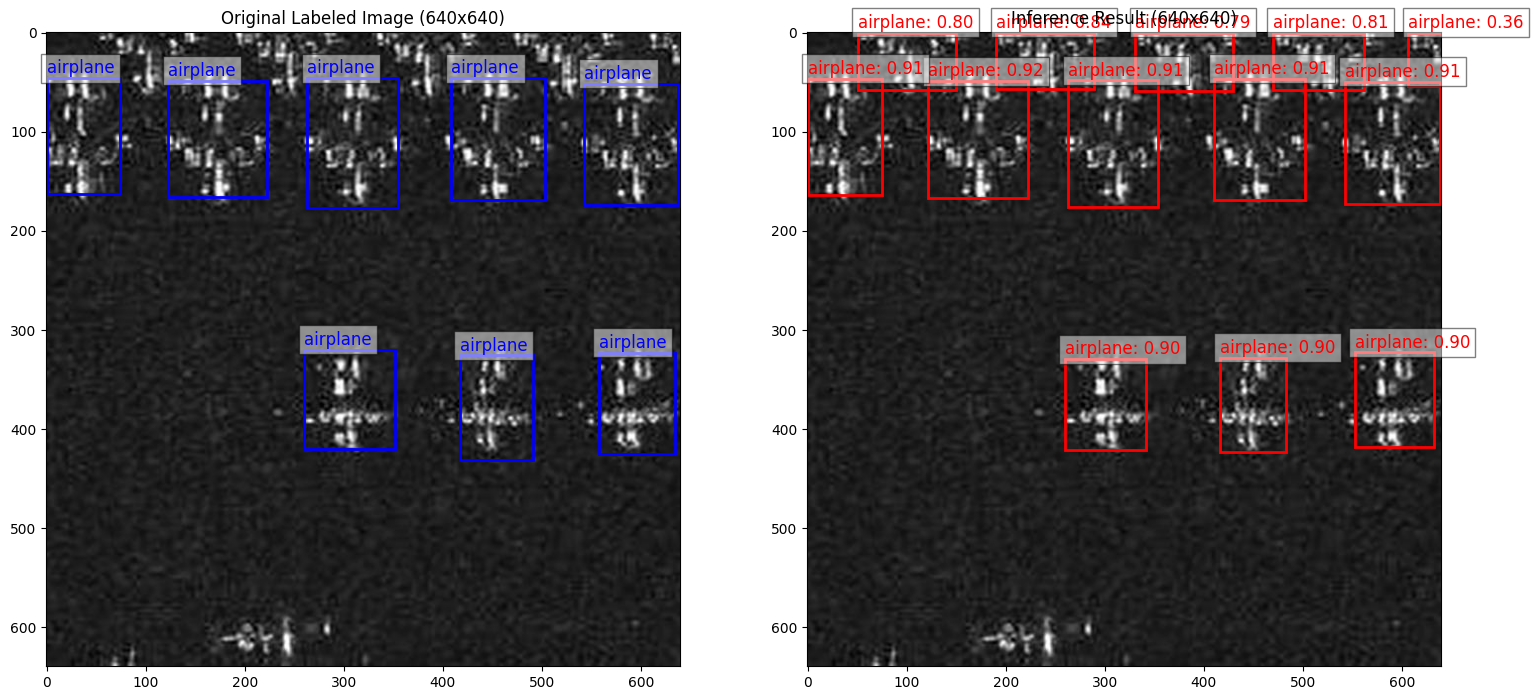

Inference Detections:
{'class': 'airplane', 'confidence': 0.9176310896873474, 'bbox': [121.6690444946289, 48.89485168457031, 222.79312133789062, 166.64686584472656]}
{'class': 'airplane', 'confidence': 0.9146353006362915, 'bbox': [410.4415283203125, 46.58015441894531, 502.473876953125, 168.47515869140625]}
{'class': 'airplane', 'confidence': 0.9140339493751526, 'bbox': [262.9852294921875, 48.1812858581543, 354.22442626953125, 175.65687561035156]}
{'class': 'airplane', 'confidence': 0.9087120294570923, 'bbox': [0.1029052734375, 46.522945404052734, 74.69363403320312, 163.69805908203125]}
{'class': 'airplane', 'confidence': 0.9078104496002197, 'bbox': [542.0849609375, 49.44761657714844, 638.434326171875, 173.01773071289062]}
{'class': 'airplane', 'confidence': 0.9037817120552063, 'bbox': [416.22515869140625, 327.9514465332031, 483.41253662109375, 423.3861999511719]}
{'class': 'airplane', 'confidence': 0.8981388807296753, 'bbox': [552.1708374023438, 322.63470458984375, 632.3534545898438, 4

In [8]:
# Load the trained YOLO model with the best weights for 640x640 image size
model = YOLO(best_weight_640_path)

test_image_path = os.path.join(test_images_640_path, test_image_name)

# Perform inference on the test image
results = model(test_image_path)  # Perform detection
detections = results[0].boxes  # Retrieve detection results from the first (and only) image

# Collect the detections in a structured format
detection_list = []
for box in detections:
    x_min, y_min, x_max, y_max = box.xyxy[0].tolist()  # Get bounding box coordinates
    confidence = box.conf[0].item()  # Get confidence score
    class_id = int(box.cls[0].item())  # Get class ID
    class_name = model.names[class_id]  # Get the class name using the model's label dictionary
    detection = {
        'class': class_name,
        'confidence': confidence,
        'bbox': [x_min, y_min, x_max, y_max]  # Format as [x_min, y_min, x_max, y_max]
    }
    detection_list.append(detection)

# Path to the corresponding label file
label_path = os.path.join(test_images_640_path.replace('images', 'labels'), test_image_name.replace('.jpg', '.txt'))

# Load original bounding boxes from the label file
original_boxes = []
with Image.open(test_image_path) as img:
    img_width, img_height = img.size
    
if os.path.exists(label_path):
    print("\nOriginal labeled detections for test image (contents of annotation file):")
    with open(label_path, 'r') as f:
        for line in f:
            print(line)
            parts = line.split()
            class_id = int(parts[0])
            x_center, y_center, width, height = map(float, parts[1:])
            x_min = (x_center - width / 2) * img_width
            y_min = (y_center - height / 2) * img_height
            x_max = x_min + width * img_width
            y_max = y_min + height * img_height
            original_boxes.append({
                'class': model.names[class_id],
                'bbox': [x_min, y_min, x_max, y_max]
            })

print("Expected number of detections:", len(original_boxes))

# Display the test image with both inference and original labeled bounding boxes side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))

# Plot original labeled image
with Image.open(test_image_path) as img:
    ax1.imshow(img)
    for box in original_boxes:
        x_min, y_min, x_max, y_max = box['bbox']
        rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='blue', facecolor='none')
        ax1.add_patch(rect)
        ax1.text(x_min, y_min - 5, box['class'], color='blue', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
    ax1.set_title('Original Labeled Image (640x640)')

# Plot inference result
with Image.open(test_image_path) as img:
    ax2.imshow(img)
    for det in detection_list:
        x_min, y_min, x_max, y_max = det['bbox']
        rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='red', facecolor='none')
        ax2.add_patch(rect)
        label = f"{det['class']}: {det['confidence']:.2f}"
        ax2.text(x_min, y_min - 5, label, color='red', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
    ax2.set_title('Inference Result (640x640)')

plt.show()

# Print detection list for inference results
print("Inference Detections:")
for det in detection_list:
    print(det)
print("Number of inference detections:", len(detection_list))